## Data cleaning and Data Exploratory Analysis

### 1-Import libraries

#### 1.1-Import the required libraries for the analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2-Import the dataset(s)

#### 2.1- Import the csv file

In [2]:
df = pd.read_csv('archive/train.csv')

### 3-Explore the dataframe

#### 3.0- Data dictionary

The trajectories for all the 442 taxis running in the city of Porto, in Portugal. Each data sample corresponds to one completed trip. It contains a total of
9 (nine) features, described as follows:

| Column Number | Column Name  | Datatype | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|---------------|--------------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1             | TRIP_ID      | STRING   | It contains an unique identifier for each trip                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 2             | CALL_TYPE    | CHAR     | It identifies the way used to demand this service. It may contain one of three possible values:  ‘A’ if this trip was dispatched from the central; ‘B’ if this trip was demanded directly to a taxi driver on a specific stand; ‘C’ otherwise (i.e. a trip demanded on a random street).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| 3             | ORIGIN_CALL  | INTEGER  | It contains an unique identifier for each phone number which was used to demand, at least, one service. It identifies the trip’s customer if CALL_TYPE=’A’. Otherwise, it assumes a NULL value                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| 4             | ORIGIN_STAND | INTEGER  | It contains an unique identifier for the taxi stand. It identifies the starting point of the trip if CALL_TYPE=’B’. Otherwise, it assumes a NULL value                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 5             | TAXI_ID      | INTEGER  | It contains an unique identifier for the taxi driver that performed each trip                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| 6             | TIMESTAMP    | INTEGER  | Unix Timestamp (in seconds). It identifies the trip’s start                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| 7             | DAYTYPE      | CHAR     | It identifies the daytype of the trip’s start. It assumes one of three possible values: ‘B’ if this trip started on a holiday or any other special day (i.e. extending holidays, floating holidays, etc.); ‘C’ if the trip started on a day before a type-B day; ‘A’ otherwise (i.e. a normal day, workday or weekend).                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| 8             | MISSING_DATA | BOOLEAN  | It is FALSE when the GPS data stream is complete and TRUE whenever one (or more) locations are missing                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| 9             | POLYLINE     | STRING   | It contains a list of GPS coordinates (i.e. WGS84 format) mapped as a string. The beginning and the end of the string are identified with brackets (i.e. [ and ], respectively). Each pair of coordinates is also identified by the same brackets as [LONGITUDE, LATITUDE]. This list contains one pair of coordinates for each 15 seconds of trip. The last list item corresponds to the trip’s destination while the first one represents its start;  The total travel time of the trip (the prediction target of this competition) is defined as the (number of points-1) x 15 seconds. For example, a trip with 101 data points in POLYLINE has a length of (101-1) * 15 = 1500 seconds. Some trips have missing data points in POLYLINE, indicated by MISSING_DATA column, and it is part of the challenge how you utilize this knowledge. |


#### 3.1- Show first n rows

In [3]:
df.head(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


#### 3.2- Show last n rows

In [4]:
df.tail(5)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
1710665,1404171463620000698,C,NaN,NaN,20000698,1404171463,A,False,"[[-8.612469,41.14602],[-8.612487,41.145993],[-..."
1710666,1404171367620000670,C,NaN,NaN,20000670,1404171367,A,False,"[[-8.610138,41.140845],[-8.610174,41.140935],[..."
1710667,1388745716620000264,C,NaN,NaN,20000264,1388745716,A,False,[]
1710668,1404141826620000248,B,NaN,12.0,20000248,1404141826,A,False,"[[-8.630712,41.154885],[-8.63073,41.154813],[-..."
1710669,1404157147620000079,B,NaN,34.0,20000079,1404157147,A,False,"[[-8.615538,41.140629],[-8.615421,41.140746],[..."


#### 3.3-Show the shape **(number of rows, number of columns)** of the dataframe

In [5]:
df.shape

(1710670, 9)

#### 3.4- Print a concise summary of a DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   TRIP_ID       int64  
 1   CALL_TYPE     object 
 2   ORIGIN_CALL   float64
 3   ORIGIN_STAND  float64
 4   TAXI_ID       int64  
 5   TIMESTAMP     int64  
 6   DAY_TYPE      object 
 7   MISSING_DATA  bool   
 8   POLYLINE      object 
dtypes: bool(1), float64(2), int64(3), object(3)
memory usage: 106.0+ MB


#### 3.5-Generate descriptive statistics.

In [7]:
df.describe()

,TRIP_ID,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP
count,1.710670e+06,364770.000000,806579.000000,1.710670e+06,1.710670e+06
mean,1.388622e+18,24490.363018,30.272381,2.000035e+07,1.388622e+09
std,9.180944e+15,19624.290043,17.747840,2.112405e+02,9.180944e+06
min,1.372637e+18,2001.000000,1.000000,2.000000e+07,1.372637e+09
25%,1.380731e+18,6593.000000,15.000000,2.000017e+07,1.380731e+09
50%,1.388493e+18,18755.000000,27.000000,2.000034e+07,1.388493e+09
75%,1.396750e+18,40808.000000,49.000000,2.000052e+07,1.396750e+09
max,1.404173e+18,63884.000000,63.000000,2.000098e+07,1.404173e+09


### 4-Data cleaning process

This step involves several steps to ensure that the dataset is ready for analysis. Here are some of them: 

**1. Loading the Data**
Read data from a CSV, Excel, SQL database, or other sources using pandas functions like `pd.read_csv()`, `pd.read_excel()`, etc.

**2. Handling Missing Data**
Identifying missing data: Use `df.isnull()` or `df.info()` to locate missing values.
Fill missing data: Use `df.fillna(value)` to replace missing values with a specific value, like the mean, median, or a constant.
Drop missing data: Use `df.dropna()` to remove rows or columns with missing values.

**3. Removing Duplicates**
Use `df.duplicated()` to identify duplicate rows.
Use `df.drop_duplicates()` to remove duplicate rows.

**4. Handling Incorrect Data Types**
Check data types with `df.dtypes()`.
Convert data types using functions like `pd.to_numeric()` for numeric columns, `pd.to_datetime()` for dates, or `astype()` for other conversions.

**5. Handling Outliers**
Identify outliers using statistical methods like standard deviation (z-score), interquartilic range or visualization tools like boxplots.
Remove or cap outliers by filtering or using quantile-based techniques.

**6. Renaming Columns**
Use `df.rename()` to rename columns to more meaningful or standardized names.

**7. Standardizing or Normalizing Data**
Convert all values to a common format or scale (e.g., all strings in lowercase with `str.lower()` or all numeric data normalized to a range).

**8. String Cleaning**
Use string methods like `str.strip()`, `str.replace()`, and regular expressions to clean up text data.

**9. Handling Categorical Data**
Convert categorical data to dummy/indicator variables using `pd.get_dummies()`.
Map categories: Use `df['column'].map()` or `df['column'].replace()` to standardize categories.

**10. Reindexing and Sorting**
Reindex the data using `df.reset_index()` or `df.set_index()` as necessary.
Sort the data with `df.sort_values()`.

**11. Dealing with Date and Time Data**
Use `pd.to_datetime()` to convert columns to datetime objects.
Extract components like year, month, or day using `df['column'].dt`.

**12. Feature Engineering**
Create new columns based on existing ones, such as aggregations, combinations, or transformations.

**13. Validation of Data Cleaning**
After cleaning, review the summary statistics with `df.describe()` and use visualizations to ensure data consistency and correctness.

**Note**: Adapt the steps to the project you're working on and use the tool Data Wrangler to simplify the process.

### 4.1- Datatype conversions

In [ ]:
def clean_data(df):
    #Data conversion ORIGIN_CALL
    #Converts ORIGIN_CALL column from float64 to INT64, invalid parsing will be set as NaN
    df["ORIGIN_CALL"] = pd.to_numeric(df["ORIGIN_CALL"], errors='coerce').astype('Int64')

    #Data conversion ORIGIN_CALL
    #Converts CALL_TYPE column from object to String
    df["CALL_TYPE"] = df["CALL_TYPE"].astype('string')

    #Data conversion ORIGIN_STAND
    #Converts ORIGIN_CALL column from float64 to INT64, invalid parsing will be set as NaN
    df["ORIGIN_STAND"] = pd.to_numeric(df["ORIGIN_STAND"], errors='coerce').astype('Int64')

    #Data conversion TRIP_ID 
    #Convert TRIP_ID from object to String
    df["TRIP_ID"] = df["TRIP_ID"].astype("string")

    #Data conversion POLYLINE
    #Convert POLYLINE from object to String
    df["POLYLINE"] = df["POLYLINE"].astype("string")

    #Data conversion DAY_TYPE
    #Convert DAY_TYPE from object to String
    df["DAY_TYPE"] = df["DAY_TYPE"].astype("string")
    return df

df_clean = clean_data(df.copy())
df_clean.head()


,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,<NA>,<NA>,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,<NA>,7,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,<NA>,<NA>,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,<NA>,<NA>,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,<NA>,<NA>,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710670 entries, 0 to 1710669
Data columns (total 9 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   TRIP_ID       string
 1   CALL_TYPE     string
 2   ORIGIN_CALL   Int64 
 3   ORIGIN_STAND  Int64 
 4   TAXI_ID       int64 
 5   TIMESTAMP     int64 
 6   DAY_TYPE      string
 7   MISSING_DATA  bool  
 8   POLYLINE      string
dtypes: Int64(2), bool(1), int64(2), string(4)
memory usage: 109.3 MB


### 5- Frequency Distributions (histograms) **(not necessary for this analysis, numeric values are not measurable)**

#### 5.1-Histogram with matplotlib 

In [ ]:
#plt.hist(df['ORIGIN_STAND'], bins=10)
#plt.show()

#### 5.2-Histogram with seaborn

In [ ]:
#sns.displot(df['ORIGIN_STAND'])

### 6- Handle outliers **(not necessary for this analysis, numeric values are not measurable)**

#### 6.1-Method 1- Using boxsplot and IQR

In [ ]:
#plt.boxplot(df['COLUMN NAME'])
#plt.grid(True)
#plt.show()

#### 6.2- Method 2- Obtain the outliers manually

In [ ]:
# Get q1, q2, q3 and iqr
q1 = df['Column name'].quantile(0.25)
q2 = df['Column name'].median()
q3 = df['Column name'].quantile(0.75)
iqr = q3 - q1 #interquartilic range

#List to add the outliers values
outliers = []

#Function to iterate and get the outliers from a column from the df
def detect_outliers(data, q1, q3, iqr):
  data = sorted(df['Columns Name'])
  lower_limit = q1 -(1.5 * iqr)
  upper_limit = q3 + (1.5 * iqr)
  for i in data:
    if (i<lower_limit or i>upper_limit):
      outliers.append(i)
  return outliers

# Call to the function
outliers_values = detect_outliers(df,q1, q3, iqr)

# Show the outliers
print(f"Quantity of ouliers: {len(outliers_values)}")
print(outliers_values)

### 7-Correlation **(not necessary for this analysis, numeric values are not measurable)**

#### 7.1- Correlation matrix

In [ ]:
# Show the relationship between the numeric columns, the corr() method ignores "not numeric" columns

#df.corr()

# Show the relationship between two numeric columns
#df['Column1'].corr(df['Column2'])

The Result of the `corr()` method is a table with a lot of numbers that represents how well the relationship is between two columns.

The number varies from -1 to 1.

1 means that there is a 1 to 1 relationship (a perfect correlation), and for this data set, each time a value went up in the first column, the other one went up as well.

0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.

-0.9 would be just as good relationship as 0.9, but if you increase one value, the other will probably go down.

0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.
What is a good correlation? It depends on the use, but I think it is safe to say you have to have at least 0.6 (or -0.6) to call it a good correlation.

#### 7.2- Scatterplot

In [ ]:
df.plot(kind = 'scatter', x = 'Column for x axis', y = 'Column for y axis')
plt.show()

### 8-Bar graphs

In [35]:
#Top n origin stands
top_n_origin_stand_count = df_clean.groupby("ORIGIN_STAND").size().sort_values(ascending=False).head(20)
print(top_n_origin_stand_count)

ORIGIN_STAND
15    80241
57    50882
9     34818
33    34128
23    33344
18    32937
53    31712
13    25685
12    25434
36    24754
34    20277
10    18627
7     18557
25    18461
14    18189
61    17202
27    17035
6     16639
21    16471
60    16235
dtype: int64


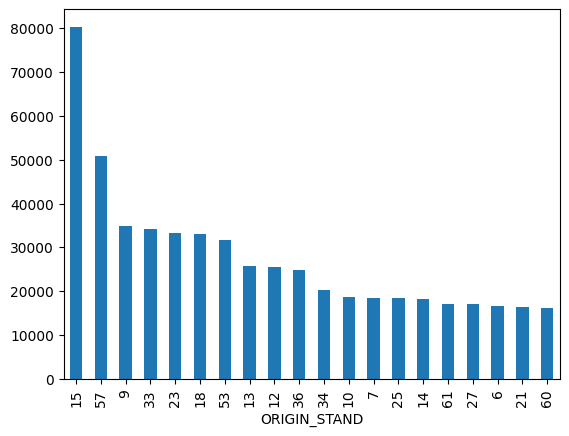

In [37]:
top_n_origin_stand_count.plot(kind='bar')
plt.show()

In [40]:
#Lowest n origin stands
lowes_n_origin_stand_count = df_clean.groupby("ORIGIN_STAND").size().sort_values(ascending=False).tail(10)
print(lowes_n_origin_stand_count)

ORIGIN_STAND
39    1464
46    1315
44    1227
2     1191
4     1153
41     506
43     493
8      381
5       53
48       7
dtype: int64


<Axes: xlabel='ORIGIN_STAND'>

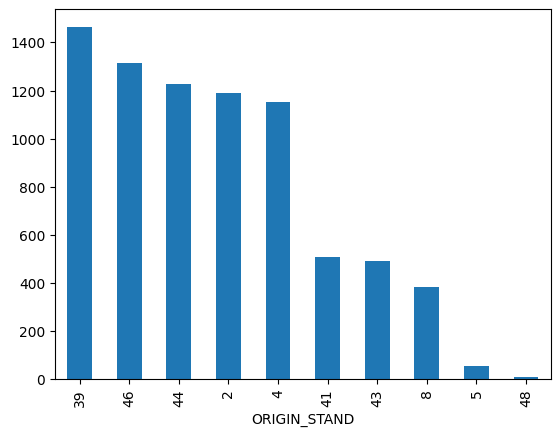

In [41]:
lowes_n_origin_stand_count.plot(kind="bar")

In [42]:
# Top n taxidrivers
top_n_taxidrivers = df_clean.groupby("TAXI_ID").size().sort_values(ascending=False).head(15)
print(top_n_taxidrivers)

TAXI_ID
20000080    10746
20000403     9238
20000066     8449
20000364     7821
20000483     7729
20000129     7609
20000307     7498
20000621     7276
20000089     7267
20000424     7176
20000492     7171
20000529     6937
20000616     6924
20000678     6538
20000372     6535
dtype: int64
